In [1]:
#Importing Libraries
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

%matplotlib inline

In [2]:
#Import File

df = pd.read_csv("cubic_zirconia.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [5]:
df.shape

(26967, 11)

In [6]:
#Dropping unnecessary column "Unnamed: 0"

df.drop('Unnamed: 0', axis =1, inplace = True)

In [7]:
df.shape

(26967, 10)

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Three categorical varibles : cut, color and clarity, rest are continuous

In [10]:
# summary of numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [11]:
# check for missing values

df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

Depth has 697 null values

In [12]:
df.eq(0).any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
x           True
y           True
z           True
price      False
dtype: bool

In [13]:
df[df['x']==0]


,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [14]:
df[df['y']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [15]:
df[df['z']==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [16]:
# Dropping the rows with 0 as value in x, and z

df.drop(df[df['z']==0].index, inplace = True) 

In [17]:
df.shape

(26958, 10)

In [18]:
# Relace Null values with Median

df['depth'].fillna(value = df['depth'].median(), inplace = True)

In [19]:
# confirm missing value count

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

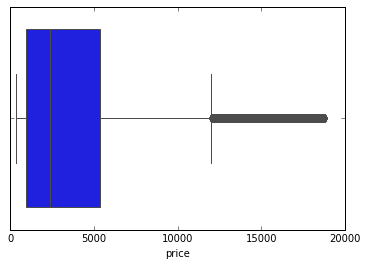

In [20]:
sns.boxplot(df.price)

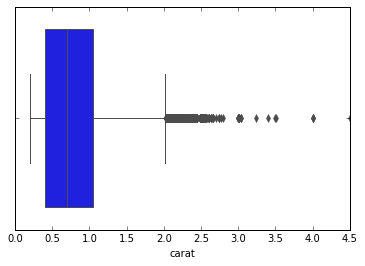

In [21]:
sns.boxplot(df.carat)

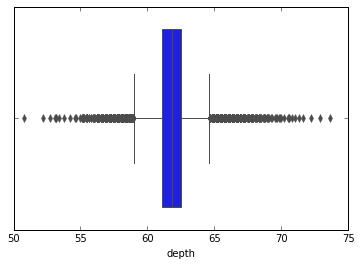

In [22]:
sns.boxplot(df.depth)

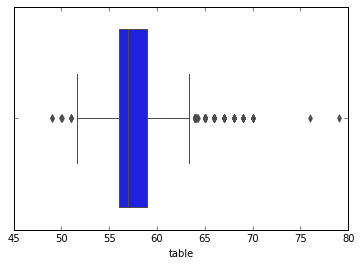

In [23]:
sns.boxplot(df.table)

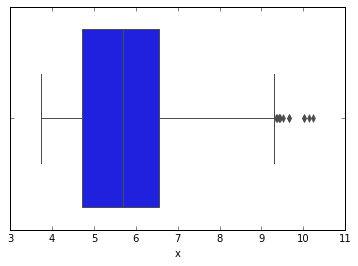

In [24]:
sns.boxplot(df.x)

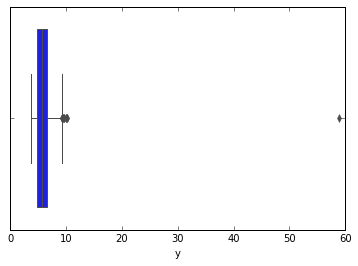

In [25]:
sns.boxplot(df.y)

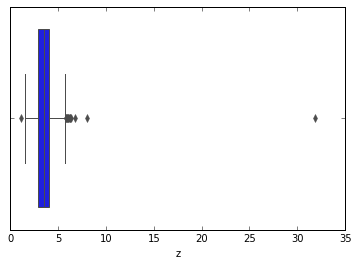

In [26]:
sns.boxplot(df.z)

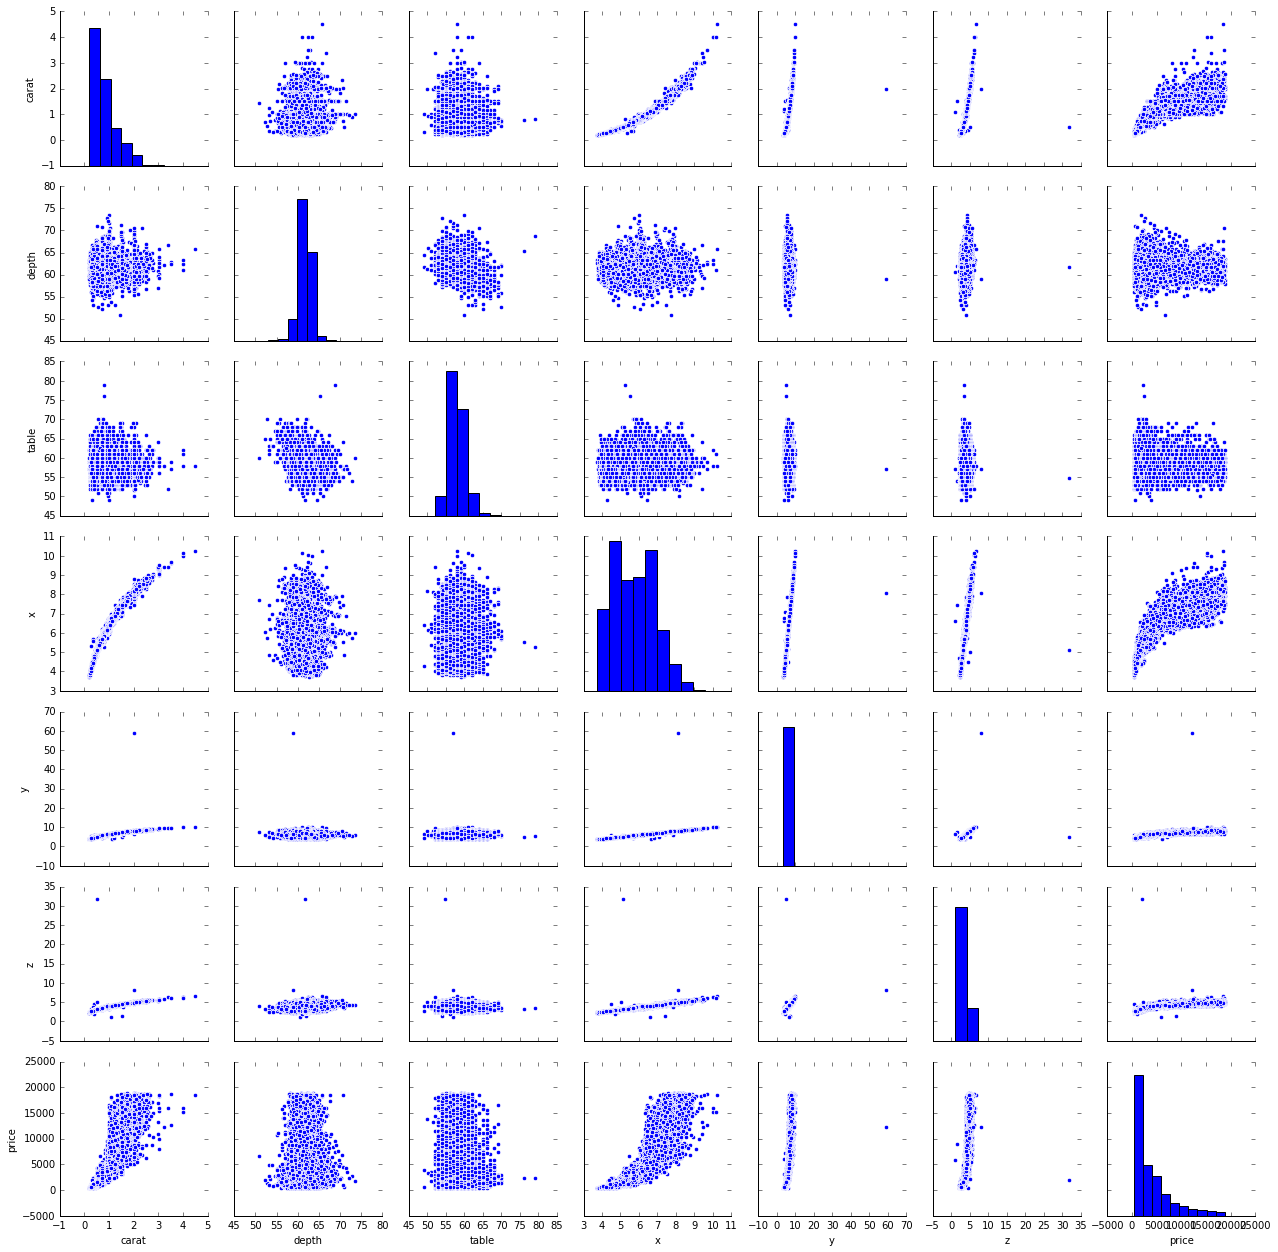

In [27]:
sns.pairplot(df)

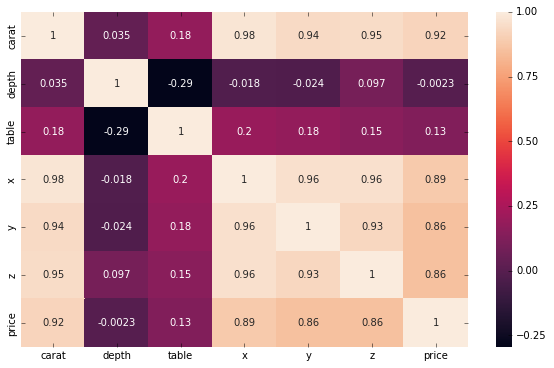

In [28]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True)

Price is highly correlated with Carat,x,y and z<br>
Carat is highly correlated with x,y and z<br>
Price is negatively correlated with Depth<br>
Also, X,Y and Z are highly correlated. Therefore, we can drop x, y and z

In [29]:
df.drop(['x','y','z'], axis =1, inplace =True)

### Dealing with Outliers

In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR) 
upper_range= Q3+(1.5 * IQR)
print('Lower Range:\n', lower_range, 'Upper Range:\n',upper_range)

Lower Range:
 carat      -0.575
depth      59.000
table      51.500
price   -5674.500
dtype: float64 Upper Range:
 carat        2.025
depth       64.600
table       63.500
price    11977.500
dtype: float64


In [31]:

# Replace every outlier on the lower side by the lower whisker
df['carat']=np.where(df['carat']< -0.575,-0.575,df['carat'])
df['depth']=np.where(df['depth']< 59.000,59.000,df['depth'])
df['table']=np.where(df['table']< 51.500,51.500,df['table'])
#df['x']=np.where(df['x']< 1.950,1.950,df['x'])
df['price']=np.where(df['price']< -5674.500,-5674.500,df['price'])

#Replace every outlier on the upper side by the upper whisker    
df['carat']=np.where(df['carat']> 2.025,2.025,df['carat'])
df['depth']=np.where(df['depth']> 64.600,64.600,df['depth'])
df['table']=np.where(df['table']> 63.500,63.500,df['table'])
#df['x']=np.where(df['x']> 9.310,9.310,df['x'])
df['price']=np.where(df['price']> 11977.500,11977.500,df['price'])

<B>Converting Categorical Data to Numeric</b><br>

For Cut:

Qality is increasing order Fair, Good, Very Good, Premium, Ideal.<br>
Thereore, we will assign the following codes:<br>

Fair : 1 <br>
Good : 2<br>
Very Good : 3<br>
Premium : 4<br>
Ideal : 5<br>


In [32]:
df.cut.value_counts()

Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64

For Color:<br>
D being the best and J the worst<br>

J : 1 <br>
I : 2<br>
H : 3<br>
G : 4<br>
F : 5<br>
E : 6<br>
D : 7<br>

In [33]:
df.color.value_counts()

G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64

For Clarity : <br>

In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3 <br>

I3 = 1, I2 = 2, I1 = 3, SI2 = 4, SI1 = 5, VS2 = 6, VS1=7, VVS2 = 8, VVS1 = 9, IF = 10, FL =11

In [34]:
df.clarity.value_counts()

SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64

In [35]:
cleanup_nums = {"cut":     {"Ideal": 5, "Premium": 4,"Very Good" : 3, "Good" : 2, "Fair":1},
                "color": {"J": 1, "I": 2, "H": 3, "G": 4,
                                  "F": 5, "E": 6, "D":7 },
               "clarity": {"I3" : 1, "I2" : 2, "I1" : 3, "SI2" : 4, "SI1" : 5, "VS2" : 6, "VS1":7,
                           "VVS2" : 8, "VVS1" : 9, "IF" : 10, "FL" :11}}

In [36]:
df.replace(cleanup_nums, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,6,5,62.1,58.0,499.0
1,0.33,4,4,10,60.8,58.0,984.0
2,0.90,3,6,8,62.2,60.0,6289.0
3,0.42,5,5,7,61.6,56.0,1082.0
4,0.31,5,5,9,60.4,59.0,779.0


In [37]:
df.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
price      float64
dtype: object

In [38]:
# Converting cut, color and clarity to cateorical

df['cut'] = pd.Categorical(df.cut, ordered= True)
df['color'] = pd.Categorical(df.color, ordered= True)
df['clarity'] = pd.Categorical(df.clarity, ordered= True)

In [39]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
dtype: object

In [40]:
#df = pd.get_dummies(df, columns=['cut','color','clarity'])

In [41]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.30,5,6,5,62.1,58.0,499.0
1,0.33,4,4,10,60.8,58.0,984.0
2,0.90,3,6,8,62.2,60.0,6289.0
3,0.42,5,5,7,61.6,56.0,1082.0
4,0.31,5,5,9,60.4,59.0,779.0


In [42]:
# check for duplicate records
dupes = df.duplicated()
print('Duplicated Record Count '+ str(dupes.sum()))
print(df[dupes])

Duplicated Record Count 294
       carat cut color clarity  depth  table    price
1747   0.270   5     3       7   61.6   56.0    480.0
2045   0.310   5     5       6   62.6   57.0    625.0
2432   0.300   5     6       8   61.8   56.0   1013.0
2690   0.340   5     5       6   62.1   56.0    880.0
2949   2.025   4     1       4   60.9   60.0  11977.5
...      ...  ..   ...     ...    ...    ...      ...
26274  1.700   4     4       6   59.0   58.0  11977.5
26413  0.270   5     2       7   61.9   54.0    432.0
26437  1.090   5     3       5   61.1   57.0   5125.0
26530  0.410   5     4      10   61.7   56.0   1367.0
26700  0.300   4     3       7   60.4   61.0    675.0

[294 rows x 7 columns]


294 Duplicate Records are present

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
# Scaling

from scipy.stats import zscore
df_scale=df.drop('price', axis = 1)
df_scale=df_scale.apply(zscore)
df_scale.head()

,carat,cut,color,clarity,depth,table
0,-1.073162,0.982400,0.941247,-0.638713,0.287444,0.259198
1,-1.007755,0.084890,-0.231173,2.396945,-0.777376,0.259198
2,0.234981,-0.812619,0.941247,1.182682,0.369354,1.185454
3,-0.811534,0.982400,0.355037,0.575550,-0.122102,-0.667058
4,-1.051360,0.982400,0.355037,1.789813,-1.105013,0.722326


In [45]:
df_scale.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [46]:
# Copy all the predictor variables into X dataframe
#X = df_scale.drop('price', axis=1)
from sklearn.preprocessing import StandardScaler
X = df_scale[['carat','cut','color','clarity','depth']]


# Copy target into the y dataframe. 
y = df[['price']]

In [47]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state = 1)

In [48]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 3638.462432876167
The coefficient for cut is 133.03479539540825
The coefficient for color is 464.5308411435908
The coefficient for clarity is 740.4260286453052
The coefficient for depth is -9.313134040767547


In [50]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3723.632350735075


In [51]:
# R square on training data

regression_model.score(X_train,y_train)

0.9291767255027183

In [52]:
# R square on testing data
regression_model.score(X_test,y_test)

0.9296181762468217

In [53]:
# Calculate MSE
import math
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

914.5294389960341

In [54]:
# Prediction on Test data
y_pred = regression_model.predict(X_test)

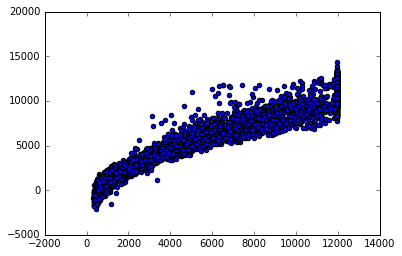

In [55]:
plt.scatter(y_test['price'], y_pred)